In [12]:
import glob
import pandas as pd
import os
from tqdm import tqdm
from collections import Counter
import random
import PIL
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read all identities' frame descriptions
all_identities_files = glob.glob("./data/frame_images_DB/*.txt")
print(f"{len(all_identities_files)} identities")
print(all_identities_files[:3])

3083 identities
['./data/frame_images_DB/Larry_Beinfest.labeled_faces.txt', './data/frame_images_DB/Akmal_Taher.labeled_faces.txt', './data/frame_images_DB/Lisa_Marie_Presley.labeled_faces.txt']


In [3]:
identities_dfs = {}
for identity_file in tqdm(all_identities_files):
    name = os.path.basename(identity_file).split('.')[0]
    identities_dfs[name] = pd.read_csv(identity_file, header=None, names=[
        "filename", "ignore1", "x", "y", "width", "height", "ignore2", "ignore3"
    ])
    identities_dfs[name].drop(columns=["ignore1", "ignore2", "ignore3"], inplace=True)
    identities_dfs[name].reset_index(inplace=True)

100%|██████████| 3083/3083 [00:05<00:00, 561.81it/s]


In [4]:
# find people with most frames
cnt = Counter()
for k, v in identities_dfs.items():
    cnt[k] = len(v)
print(cnt.most_common(20))

[('Gabi_Zimmer', 6070), ('Linda_Franklin', 5944), ('Frank_Abagnale_Jr', 4278), ('Gary_Barnett', 4094), ('Rocco_Buttiglione', 3341), ('Natasha_McElhone', 3257), ('Peter_Goldmark', 3201), ('Darrell_Issa', 2916), ('Kristen_Breitweiser', 2856), ('Wes_Craven', 2697), ('Lucio_Stanca', 2637), ('GL_Peiris', 2625), ('Baburam_Bhattari', 2580), ('Richard_Lennon', 2564), ('Lino_Oviedo', 2555), ('Christopher_Walken', 2524), ('James_Lockhart', 2514), ('Tessa_Jowell', 2423), ('Elaine_Chao', 2422), ('Fred_Eckhard', 2398)]


In [5]:
selected_people = [
    "Gabi_Zimmer",  # F
    "Linda_Franklin",  # F
    "Frank_Abagnale_Jr",  # M
    "Gary_Barnett",  # M
    "Rocco_Buttiglione",  # M
    "Natasha_McElhone",  # F
    "Peter_Goldmark",  # M
    "Darrell_Issa",  # M
    "Kristen_Breitweiser",  # F
    "Tessa_Jowell",  # F
]

Linda_Franklin/0/0.421.jpg
(360, 480, 3)
(107, 107, 3)


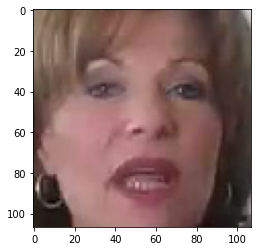

In [27]:
example_file = identities_dfs[selected_people[1]]["filename"][0]
example_file = example_file.replace("\\", "/")
print(example_file)
x = identities_dfs[selected_people[1]]["x"][0]
y = identities_dfs[selected_people[1]]["y"][0]
width = identities_dfs[selected_people[1]]["width"][0]
height = identities_dfs[selected_people[1]]["height"][0]

x_min = x - width // 2
y_min = y - height // 2

example_img = np.array(PIL.Image.open("data/frame_images_DB/" + example_file))
print(example_img.shape)
example_img = example_img[y_min:y_min + height, x_min:x_min + width]
print(example_img.shape)
plt.imshow(example_img)

In [29]:
NUM_FRAMES = 500

for i, name in enumerate(tqdm(selected_people)):
    df_selected_frames = identities_dfs[name].sample(n=NUM_FRAMES)
    os.mkdir(f"dataset/{i}")
    for j, (filename, x, y, width, height) in enumerate(
        zip(
            df_selected_frames["filename"],
            df_selected_frames["x"], df_selected_frames["y"],
            df_selected_frames["width"],
            df_selected_frames["height"]
        )
    ):
        filename = filename.replace("\\", "/")
        x_min = x - width // 2
        y_min = y - height // 2

        img = np.array(PIL.Image.open("data/frame_images_DB/" + filename))
        img = img[y_min:y_min + height, x_min:x_min + width]
        img = PIL.Image.fromarray(img)
        img.save(f"dataset/{i}/{j}.jpg")


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


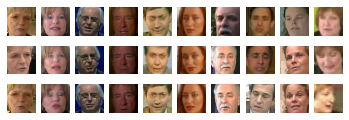

In [51]:
fig, ax = plt.subplots(3,10)
fig.subplots_adjust(bottom=0.5)
for i in range(len(selected_people)):
    for j in range(3):
        img = np.array(PIL.Image.open(f"dataset/{i}/{j}.jpg"))
        ax[j, i].imshow(img)
        ax[j, i].axis("off")
plt.show()